## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.
### Step 1: Importing and Merging Data

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np

In [8]:
churn_data = pd.read_csv("churn_data.csv")
churn_data.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [11]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head(5)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [17]:
telecom_data = customer_data.merge(internet_data, how="inner", on="customerID").merge(churn_data, how="inner", on="customerID").set_index('customerID')
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
telecom_data.shape

(7043, 20)

In [20]:
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  tenure            7043 non-null   int64  
 13  PhoneService      7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [23]:
def convert_binary(l):
    return l.map({'Yes':1, "No":0})

col_list = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
telecom_data[col_list] = telecom_data[col_list].apply(convert_binary)

In [27]:
telecom_data['gender'] = telecom_data['gender'].map({'Male':1, 'Female': 0})

In [31]:
telecom_data = pd.concat([telecom_data,  pd.get_dummies(telecom_data[['Contract','PaymentMethod', 'InternetService']], drop_first=True)], axis=1)
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,No phone service,DSL,No,Yes,No,No,...,29.85,29.85,0,0,0,0,1,0,0,0
5575-GNVDE,1,0,0,0,No,DSL,Yes,No,Yes,No,...,56.95,1889.5,0,1,0,0,0,1,0,0
3668-QPYBK,1,0,0,0,No,DSL,Yes,Yes,No,No,...,53.85,108.15,1,0,0,0,0,1,0,0
7795-CFOCW,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,...,42.30,1840.75,0,1,0,0,0,0,0,0
9237-HQITU,0,0,0,0,No,Fiber optic,No,No,No,No,...,70.70,151.65,1,0,0,0,1,0,1,0


In [32]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom_data['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom_data['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom_data['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom_data['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom_data['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom_data['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom_data['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data,sm1], axis=1)
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,No phone service,DSL,No,Yes,No,No,...,0,1,1,0,1,0,1,0,1,0
5575-GNVDE,1,0,0,0,No,DSL,Yes,No,Yes,No,...,1,0,0,1,1,0,1,0,1,0
3668-QPYBK,1,0,0,0,No,DSL,Yes,Yes,No,No,...,0,1,1,0,1,0,1,0,1,0
7795-CFOCW,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,...,1,0,0,1,0,1,1,0,1,0
9237-HQITU,0,0,0,0,No,Fiber optic,No,No,No,No,...,1,0,1,0,1,0,1,0,1,0


In [33]:
# We have created dummies for the below variables, so we can drop them
telecom_data = telecom_data.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [39]:
telecom_data['TotalCharges']  = pd.to_numeric(telecom_data['TotalCharges'], errors="coerce")
telecom_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,1,1,0,1,0,1,0
3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,0,...,0,1,1,0,1,0,1,0,1,0
7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,1,0,1,1,0,1,0
9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,1,0,1,0,1,0,1,0


In [41]:
internet_data['OnlineBackup'].astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [44]:
# Checking for outliers in the continuous variables
num_telecom = telecom_data[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [48]:
num_telecom.isnull().sum()

tenure             0
MonthlyCharges     0
SeniorCitizen      0
TotalCharges      11
dtype: int64

In [49]:
telecom_data = telecom_data[~np.isnan(telecom_data['TotalCharges'])]
telecom_data.shape

(7032, 30)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(telecom_data.drop(['Churn'], axis=1), telecom_data['Churn'], train_size=0.7, test_size=0.3, random_state=10)
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [51]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
6215-NQCPY,0,0,0,-0.734610,1,1,1.149617,-0.336030,0,0,...,1,0,1,0,1,0,0,1,0,1
5317-FLPJF,0,0,0,1.339994,0,1,-0.123297,0.816714,0,1,...,1,0,0,1,0,1,0,1,0,1
8587-XYZSF,0,0,0,1.380672,1,0,-0.481771,0.407121,0,1,...,1,0,1,0,0,1,1,0,1,0
6878-GGDWG,0,1,0,-0.043075,1,0,-1.515702,-0.742244,0,0,...,0,0,0,0,0,0,0,0,0,0
5712-PTIWW,0,0,0,-1.263430,1,1,0.490755,-0.956717,0,0,...,1,0,0,1,0,1,1,0,1,0


In [53]:
### Checking the Churn Rate
churn = (sum(telecom_data['Churn'])/len(telecom_data['Churn'].index))*100
churn

26.578498293515356

In [54]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

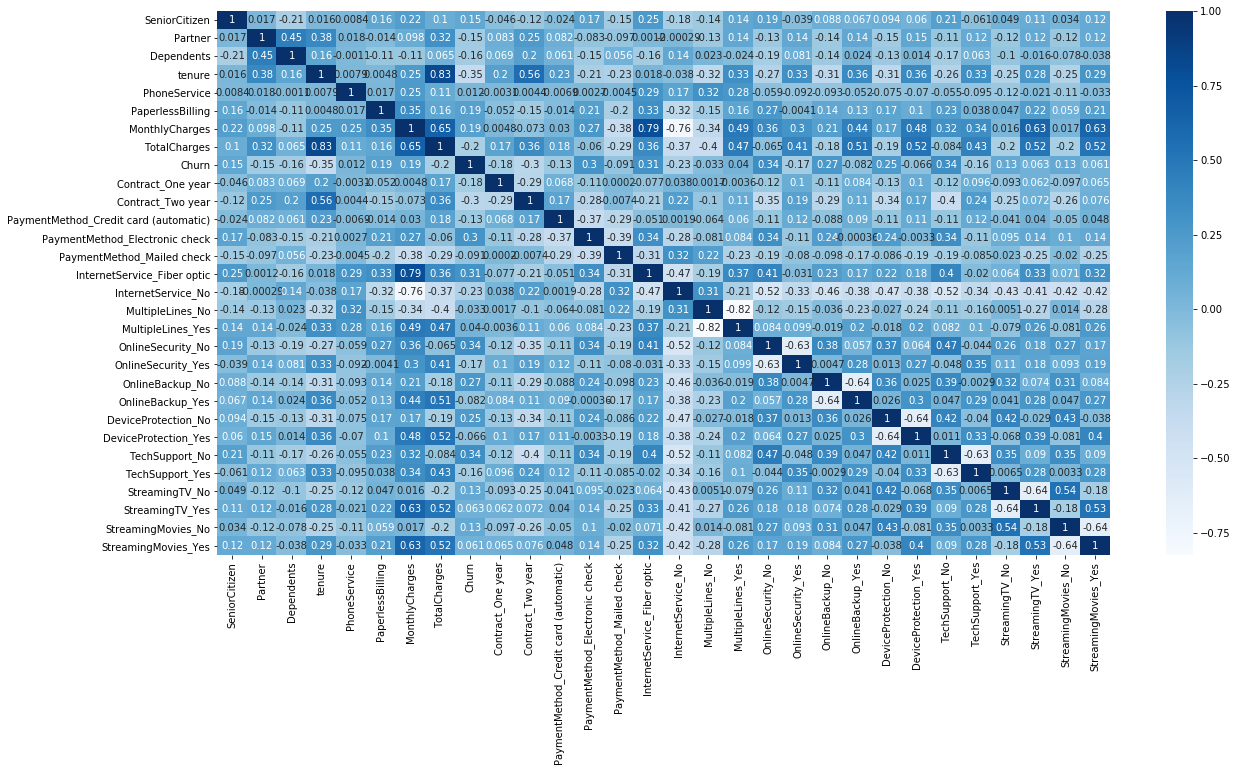

In [56]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom_data.corr(),annot = True, cmap="Blues")
plt.show()

In [57]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

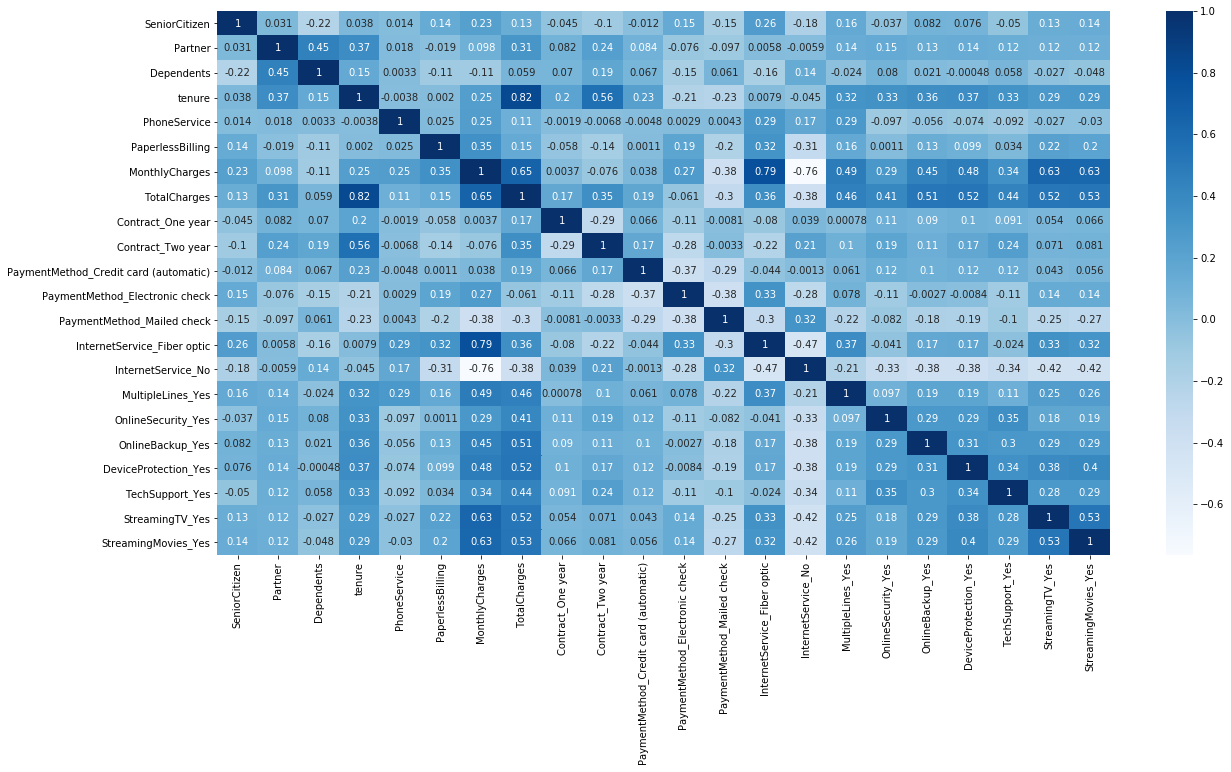

In [58]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap='Blues')
plt.show()

In [59]:
import statsmodels.api as sm

In [60]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.4
Date:                Wed, 29 Apr 2020   Deviance:                       4134.7
Time:                        01:39:50   Pearson chi2:                 5.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.4935      1.511     -2.973      0.003      -7.456      -1.531
SeniorCitizen                             0.2367      0.101      2.337      0.019       0.038       0.435
Partner                                  -0.0381      0.092     -0.415      0.678      -0.218       0.142
Dependents                               -0.1306      0.105     -1.243      0.214      -0.336       0.075
tenure                                   -1.4811      0.178     -8.332      0.000      -1.830      -1.133
PhoneService                              1.1615      0.764      1.521      0.128      -0.335       2.658
PaperlessBilling                          0.3063      0.088      3.462      0.001       0.133       0.480
MonthlyCharges                           -2.6794      1.124     -2.384      0.017      -4.882      -0.476
TotalCharges                              0.7794      0.187      4.159      0.000       0.412       1.147
Contract_One year                        -0.6530      0.128     -5.108      0.000      -0.904      -0.402
Contract_Two year                        -1.2829      0.200     -6.426      0.000      -1.674      -0.892
PaymentMethod_Credit card (automatic)    -0.0495      0.133     -0.372      0.710      -0.310       0.211
PaymentMethod_Electronic check            0.2445      0.112      2.184      0.029       0.025       0.464
PaymentMethod_Mailed check               -0.0517      0.136     -0.379      0.705      -0.319       0.215
InternetService_Fiber optic               2.8624      0.939      3.047      0.002       1.021       4.704
InternetService_No                       -3.1206      0.948     -3.292      0.001      -4.979      -1.263
MultipleLines_Yes                         0.6252      0.209      2.995      0.003       0.216       1.034
OnlineSecurity_Yes                       -0.0178      0.210     -0.085      0.932      -0.429       0.393
OnlineBackup_Yes                          0.2917      0.207      1.410      0.159      -0.114       0.697
DeviceProtection_Yes                      0.3988      0.210      1.896      0.058      -0.013       0.811
TechSupport_Yes                           0.0510      0.214      0.239      0.811      -0.368       0.470
StreamingTV_Yes                           1.1135      0.384      2.901      0.004       0.361       1.866
StreamingMovies_Yes                       1.0689      0.384      2.785      0.005       0.317       1.821
=========================================================================================================
"""